In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data_by_station/C6.zip')

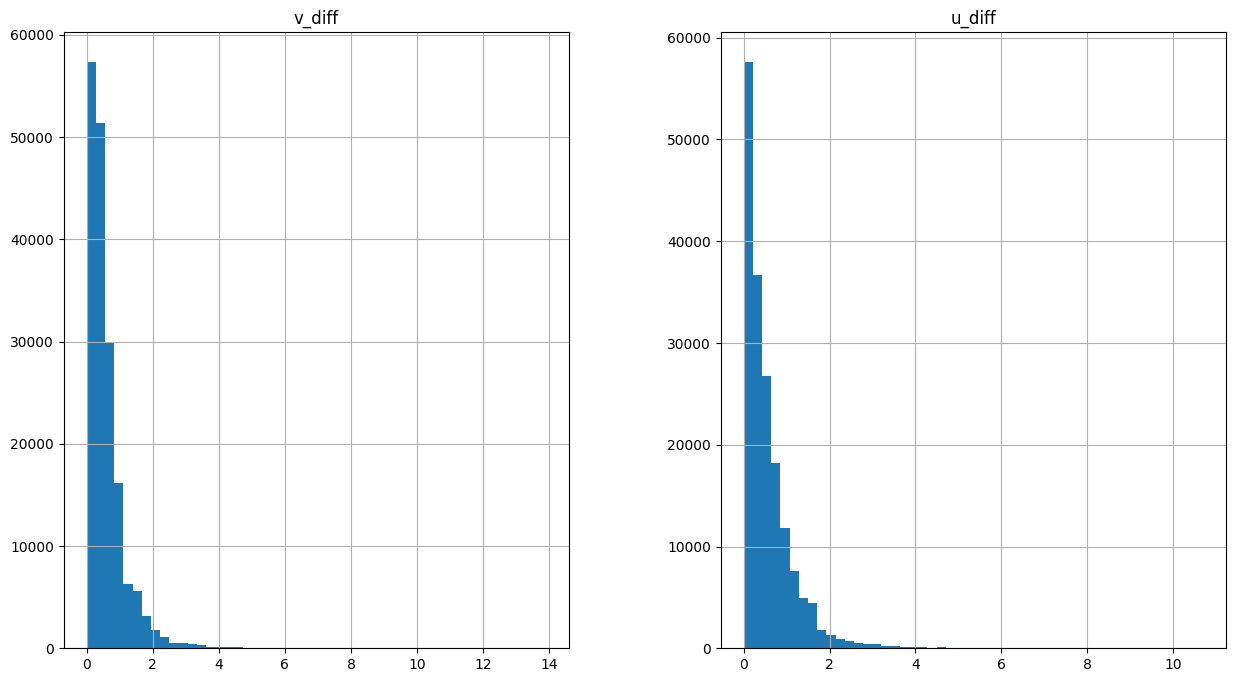

In [3]:
df_copy = df.copy()

df_copy['v_diff'] = abs(df_copy['v10'] - df_copy['v10'].shift(1))
df_copy['v_diff'] = df_copy['v_diff'].fillna(0)

df_copy['u_diff'] =  abs(df_copy['u10'] - df_copy['u10'].shift(1))
df_copy['u_diff'] = df_copy['u_diff'].fillna(0)

df_copy[['v_diff','u_diff']].hist(bins=50, figsize=(15,8))
plt.savefig('plots/diff1.png')
plt.show()
del df_copy

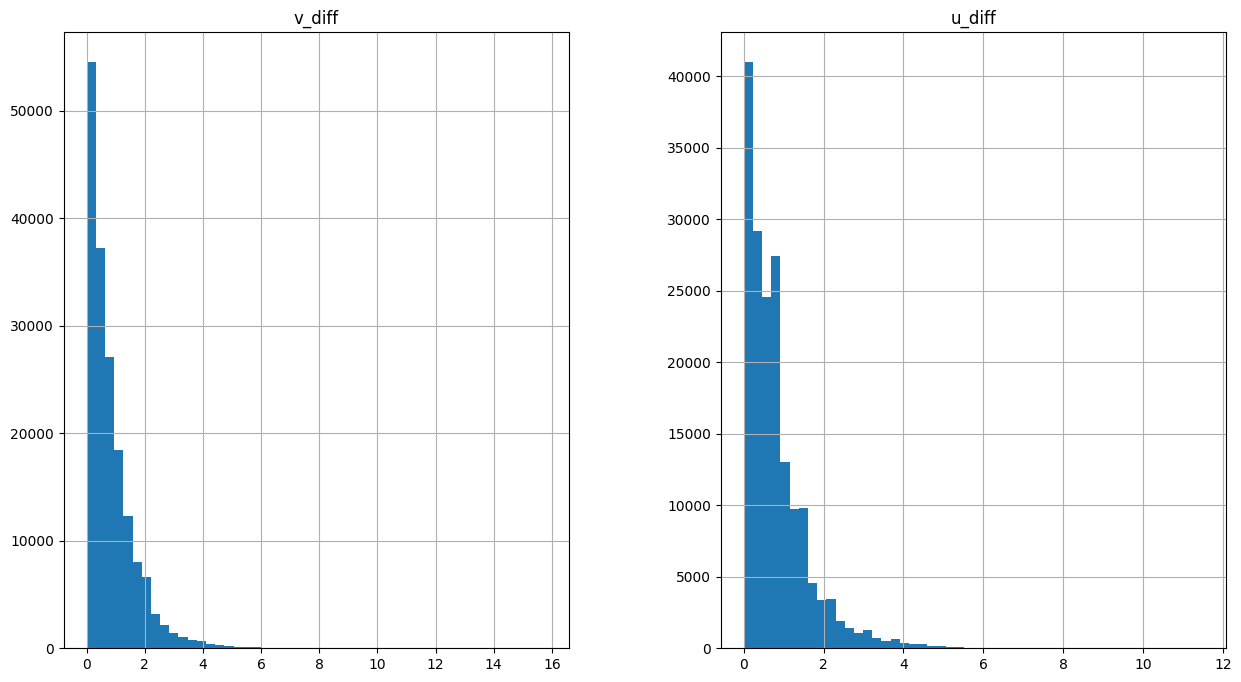

In [4]:
df_copy = df.copy()

df_copy['v_diff'] = abs(df_copy['v10'] - df_copy['v10'].shift(2))
df_copy['v_diff'] = df_copy['v_diff'].fillna(0)

df_copy['u_diff'] =  abs(df_copy['u10'] - df_copy['u10'].shift(2))
df_copy['u_diff'] = df_copy['u_diff'].fillna(0)

df_copy[['v_diff','u_diff']].hist(bins=50, figsize=(15,8))
plt.savefig('plots/diff2.png')
plt.show()
del df_copy


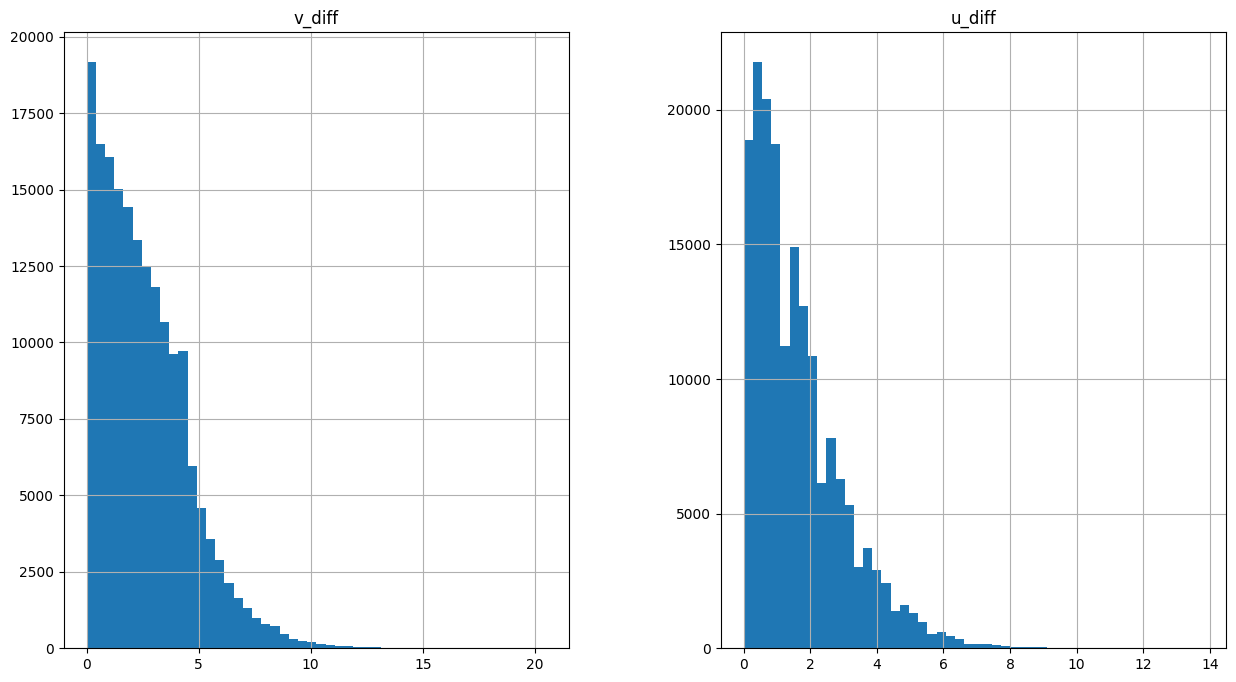

In [5]:
df_copy = df.copy()

df_copy['v_diff'] = abs(df_copy['v10'] - df_copy['v10'].shift(24))
df_copy['v_diff'] = df_copy['v_diff'].fillna(0)

df_copy['u_diff'] =  abs(df_copy['u10'] - df_copy['u10'].shift(24))
df_copy['u_diff'] = df_copy['u_diff'].fillna(0)

df_copy[['v_diff','u_diff']].hist(bins=50, figsize=(15,8))
plt.savefig('plots/diff12h.png')
plt.show()
del df_copy


Num GPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


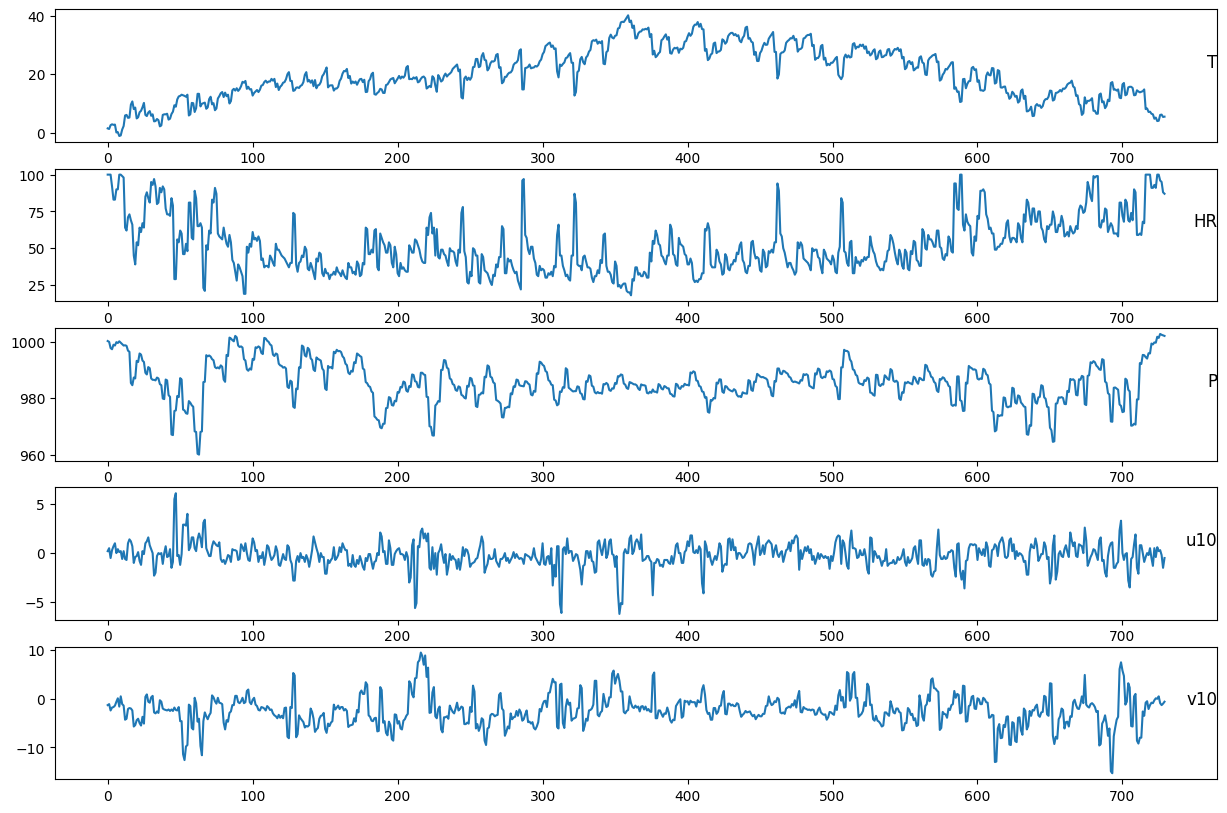

In [6]:
import os
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
print("Num GPUs Available: ", tf.config.list_physical_devices())
df = pd.read_csv('data/data_by_station/C6.zip', compression='zip', header=0, sep=',')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df = df.astype({'T': 'float', 'HR': 'float', 'P': 'float', 'u2': 'float', 'v2': 'float', 'u6': 'float', 'v6': 'float', 'u10': 'float', 'v10': 'float', 'altitud': 'float', 'latitud': 'float', 'longitud': 'float'})
df.head()
copy_df = df.copy()
copy_df.set_index('date', inplace=True)
copy_df = copy_df[(copy_df.index.year == 2019) & (copy_df.index.hour == 12)]
groups = [0, 1, 2, 8, 9] 
i = 1
values = copy_df.values
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(copy_df.columns[group], y=0.5, loc='right')
    i += 1
plt.savefig('plots/variables_month.png')
plt.show()
del copy_df, groups, i, values